<a href="https://colab.research.google.com/github/gsasikiran/Semantic-similarity/blob/master/bert_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
!pip3 install bert-embedding
!apt-get install python-nltk

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libladr4 prover9 python-six
Suggested packages:
  ladr4-apps prover9-doc
The following NEW packages will be installed:
  libladr4 prover9 python-nltk python-six
0 upgraded, 4 newly installed, 0 to remove and 8 not upgraded.
Need to get 1,177 kB of archives.
After this operation, 6,285 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libladr4 amd64 0.0.200911a-2.1build1 [168 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 prover9 amd64 0.0.200911a-2.1build1 [77.8 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 python-six all 1.11.0-2 [11.3 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python-nltk all 3.2.

In [130]:

import scipy
import matplotlib.pyplot as plt
import numpy as np
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize
from bert_embedding import BertEmbedding
from matplotlib import cm as cm

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [122]:
input_1 = input('Enter sentence 1')
input_2 = input('Enter sentence 2')

splitted_input_1 = word_tokenize(input_1)
splitted_input_2 = word_tokenize(input_2)

embedding_1 = BertEmbedding().embedding(sentences = splitted_input_1)
embedding_2 = BertEmbedding().embedding(sentences = splitted_input_2)

Enter sentence 1A man is cutting a potato.
Enter sentence 2A woman is cutting a tomato.


In [0]:
def create_word_vectors(embedding):
  word = []
  for i in range(len(embedding)):
    word.append(embedding[i][1][0])
  return word

def cosine_similarity_matrix(array_1, array_2):
  matrix = np.zeros((len(array_1), len(array_2)))
  print(matrix.shape)
  
  for i in range(0, len(array_1)):
    for j in range(0, len(array_2)):
      matrix[i][j]= scipy.spatial.distance.cosine(array_1[i], array_2[j])
  return matrix

In [0]:
word_arrays_1 = create_word_vectors(embedding_1)
word_arrays_2 = create_word_vectors(embedding_2)

(7, 7)


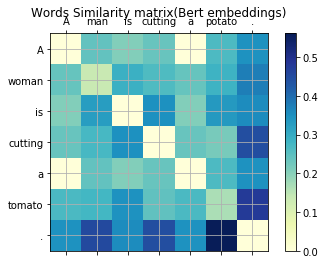

In [134]:
# Code from https://kapilddatascience.wordpress.com/2016/05/29/plotting-similarity-score-in-a-matrix/

x_labels = splitted_input_1
y_labels = splitted_input_2
hood_cosine_matrix = cosine_similarity_matrix(word_arrays_1,word_arrays_2)
 
fig, ax = plt.subplots()
cmap = cm.get_cmap('YlGnBu')
cax = ax.matshow(hood_cosine_matrix, interpolation='nearest', cmap =cmap)
ax.grid(True)
plt.title('Words Similarity matrix(Bert embeddings)')
plt.xticks(range(len(x_labels)), x_labels);
plt.yticks(range(len(y_labels)), y_labels);
fig.colorbar(cax)
plt.show()